### 线性SVM

In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns 
import scipy.io as sio
import matplotlib.pyplot as plt 

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print (mat.keys())
data = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


### visualize data

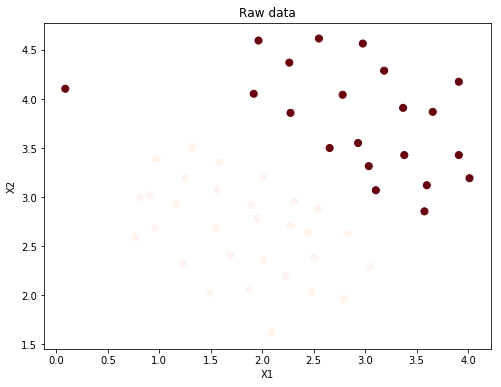

In [3]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'],data['X2'],s=50,c=data['y'],cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

### try C= 1
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [5]:
svc1 = sklearn.svm.LinearSVC(C=1,loss='hinge')
svc1.fit(data[['X1','X2']],data['y'])
svc1.score(data[['X1','X2']],data['y'])

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [7]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1','X2']])

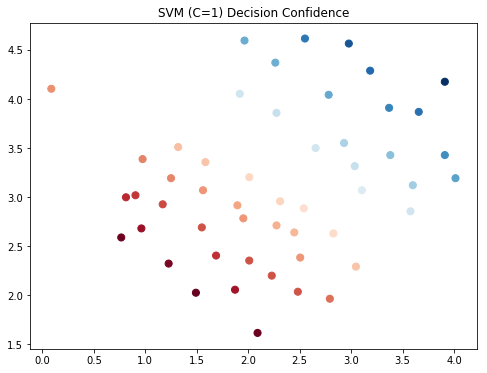

In [8]:
fig , ax = plt.subplots(figsize = (8,6))
ax.scatter(data['X1'],data['X2'],s=50,c=data['SVM1 Confidence'],cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

### try C =100

In [9]:
scv100 = sklearn.svm.LinearSVC(C=100,loss='hinge')
scv100.fit(data[['X1','X2']],data['y'])
scv100.score(data[['X1','X2']],data['y'])

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9019607843137255

In [11]:
data['SVM100 Confidence'] = scv100.decision_function(data[['X1','X2']])

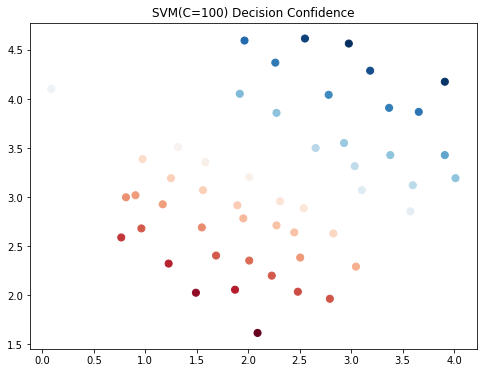

In [12]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'],data['X2'],s=50,c=data['SVM100 Confidence'],cmap='RdBu')
ax.set_title('SVM(C=100) Decision Confidence')
plt.show()

In [13]:
data.head()

,X1,X2,y,SVM! Confidence,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.805194,0.805194,4.935428
1,2.2753,3.8589,1,0.386753,0.386753,2.921436
2,2.9781,4.5651,1,1.379963,1.379963,6.096281
3,2.9320,3.5519,1,0.524259,0.524259,2.737688
4,3.5772,2.8560,1,0.336981,0.336981,1.272503


### Gaussian kernels

In [14]:
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-np.power(x1 - x2 ,2).sum()/(2 * (sigma ** 2 )))

In [15]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2 
gaussian_kernel(x1,x2,sigma)

0.32465246735834974

### load data

In [16]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'),columns = ['X1','X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [17]:
data.shape

(863, 3)

### visualize data

#sns.set(context="notebook",style="white",palette=sns.diverging_palette(240,10,n=2))
sns.set(context="notebook", style="white", palette=sns.diverging_palette(240, 10, n=2))
sns.lmplot('X1','X2',hue='y',data=data,
          size = 5,
          fit_reg = False,
          scatter_kws={"s":10}
          )
plt.show()

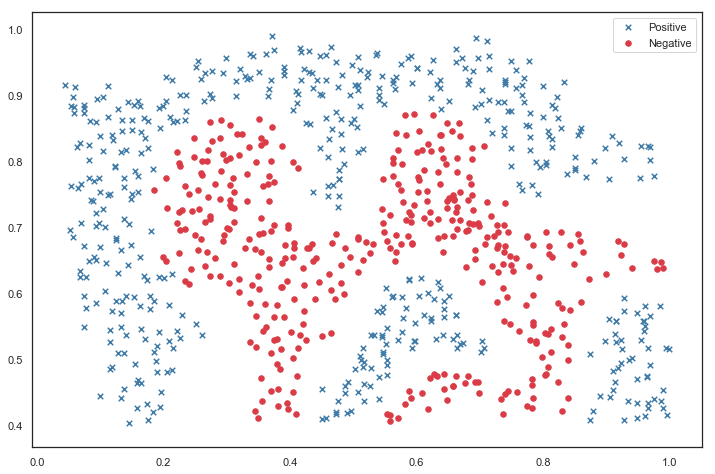

In [27]:
raw_data = sio.loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'],columns = ['X1','X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'],positive['X2'],s=30,marker='x',label = 'Positive')
ax.scatter(negative['X1'],negative['X2'],s=30,marker='o',label = 'Negative')
ax.legend()
plt.show()

### try built-in Gaussian Kernel of sklearn

In [31]:
svc = sklearn.svm.SVC(C=100,kernel='rbf',gamma=10,probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

In [33]:
predict_prob = svc.predict_proba(data[['X1','X2']])[:,0]

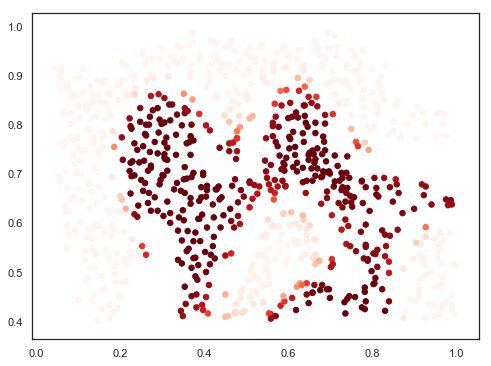

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'],data['X2'],s=30,c=predict_prob,cmap='Reds')
plt.show()

### 寻找最优参数，数据集3分为训练集和测试集

In [38]:
raw_data = sio.loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma':None}

for  C in C_values:
    for gamma in gamma_values :
        svc = sklearn.svm.SVC(C = C , gamma= gamma)
        svc.fit(X,y)
        score = svc.score(Xval,yval)
        
        if score > best_score :
            best_score = score 
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score,best_params        

(0.965, {'C': 0.3, 'gamma': 100})

In [42]:
best_svc = sklearn.svm.SVC(C=100,gamma=0.3)
best_svc.fit(X,y)
ypred = best_svc.predict(Xval)

print (sklearn.metrics.classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

   micro avg       0.93      0.93      0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



### spam filter 

In [43]:
from sklearn import svm
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression


In [44]:
mat_tr = sio.loadmat('data/spamTrain.mat')
mat_tr.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [45]:
X ,y = mat_tr.get('X'), mat_tr.get('y').ravel()
X.shape, y.shape

((4000, 1899), (4000,))

In [46]:
mat_test = sio.loadmat('data/spamTest.mat')
mat_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [47]:
test_X ,test_y = mat_test.get('Xtest'),mat_test.get('ytest').ravel()
test_X.shape ,test_y.shape

((1000, 1899), (1000,))

### fit SVM model

In [48]:
svc = svm.SVC()

In [50]:
svc.fit(X,y)

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
pred = svc.predict(test_X)
print (metrics.classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



### what about linear logistic regression?

In [53]:
logit = LogisticRegression()
logit.fit(X,y)

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred = logit.predict(test_X)

In [55]:
print (metrics.classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



逻辑回归比SVM强多了